<a href="https://colab.research.google.com/github/syedanida/NeuralNetworks_with_Keras/blob/main/1_Data_Augmentation_%26_Generalization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PART 1: Data Augmentation & Generalization Techniques

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Build a simple model using L1 and L2 regularization
model = keras.Sequential([
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                 input_shape=(784,)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Notebook: Part 1b – Dropout Example

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Simple model with Dropout layers to reduce overfitting
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Notebook: Part 1c – Early Stopping Example

import tensorflow as tf
from tensorflow import keras

# Define EarlyStopping callback to halt training when validation loss plateaus
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

print("EarlyStopping callback created. Use it with model.fit(), for example:")
print("model.fit(x_train, y_train, validation_data=(x_val, y_val), callbacks=[early_stop])")


EarlyStopping callback created. Use it with model.fit(), for example:
model.fit(x_train, y_train, validation_data=(x_val, y_val), callbacks=[early_stop])


In [ ]:
# Notebook: Part 1d – Monte Carlo Dropout Example

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define a model that forces dropout during inference to estimate prediction uncertainty
class MCDropoutModel(keras.Model):
    def __init__(self):
        super(MCDropoutModel, self).__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.5)
        self.dense2 = layers.Dense(10, activation='softmax')

    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        # Force dropout even at inference time for Monte Carlo sampling
        x = self.dropout(x, training=True)
        return self.dense2(x)

mc_model = MCDropoutModel()
mc_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mc_model.summary()


Model: "mc_dropout_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Notebook: Part 1e – Weight Initializations Example

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Demonstrate several common weight initializers
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
    layers.Dense(10, activation='softmax', kernel_initializer='lecun_normal')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Notebook: Part 1f – Batch Normalization Example

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model employing Batch Normalization to stabilize training
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,562 (217.04 KB)

 Trainable params: 55,306 (216.04 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Custom Dropout layer by subclassing tf.keras.layers.Layer
class CustomDropout(layers.Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            noise_shape = tf.shape(inputs)
            random_tensor = 1 - self.rate
            random_tensor += tf.random.uniform(noise_shape, dtype=inputs.dtype)
            binary_tensor = tf.floor(random_tensor)
            return inputs / (1 - self.rate) * binary_tensor
        return inputs

# A simple custom regularizer, inheriting from keras.regularizers.Regularizer
class CustomRegularizer(keras.regularizers.Regularizer):
    def __init__(self, factor=1e-4):
        self.factor = factor

    def __call__(self, weight_matrix):
        return self.factor * tf.reduce_sum(tf.abs(weight_matrix))

# Build a model using the custom dropout and regularizer
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=CustomRegularizer(), input_shape=(784,)), # Use CustomRegularizer instance
    CustomDropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_dropout_1 (CustomDropout)     │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Notebook: Part 1h – Callbacks and TensorBoard Example

import tensorflow as tf
from tensorflow import keras

# Setup TensorBoard logging
log_dir = "logs/fit/"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

print("TensorBoard callback created. Integrate it with model.fit() like so:")
print("model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])")


TensorBoard callback created. Integrate it with model.fit() like so:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
# Notebook: Part 1i – Keras Tuner Example
# Uncomment the next line if keras-tuner is not installed:
# !pip install keras-tuner

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential([
        layers.Dense(units=hp.Int('units', min_value=32, max_value=256, step=32),
                     activation='relu', input_shape=(784,)),
        layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=3, executions_per_trial=1)

# To start tuning, provide your training data:
# tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
print("Keras Tuner setup complete. Uncomment tuner.search() and supply your data.")


Keras Tuner setup complete. Uncomment tuner.search() and supply your data.


In [ ]:
!pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 39.4 MB/s eta 0:00:00


In [ ]:
# Notebook: Part 1j – Keras CV Data Augmentation Example
# Uncomment the next line if keras-cv is not installed:
# !pip install keras-cv

import tensorflow as tf
from tensorflow import keras
import keras_cv

# Create a data augmentation pipeline using Keras CV
data_augmentation = keras.Sequential([
    keras_cv.layers.RandomFlip("horizontal"),
    keras_cv.layers.RandomRotation(0.1),
    keras_cv.layers.RandomZoom(height_factor=0.2, width_factor=0.2)
])

# Example usage:
# image = ... (load or create an image tensor)
# augmented_image = data_augmentation(image)
print("Keras CV data augmentation pipeline is set up.")


Keras CV data augmentation pipeline is set up.


In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 9.6 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Notebook: Part 1k – Data Augmentation for Multiple Modalities

# --- Image Augmentation using ImageDataGenerator ---
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Example for image augmentation:
# img = ... (load your image as a NumPy array)
# augmented_images = next(datagen.flow(np.expand_dims(img, 0)))
print("Image augmentation using ImageDataGenerator is ready.")

# --- Text Augmentation using nlpaug ---
# Uncomment the next line if nlpaug is not installed:
# !pip install nlpaug

import nlpaug.augmenter.word as naw

text_aug = naw.SynonymAug(aug_src='wordnet')
text = "The quick brown fox jumps over the lazy dog."
augmented_text = text_aug.augment(text)
print("Original text:", text)
print("Augmented text:", augmented_text)


Image augmentation using ImageDataGenerator is ready.
Original text: The quick brown fox jumps over the lazy dog.
Augmented text: ['The straightaway john brown fox leap over the lazy dog.']


In [ ]:
!pip install fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

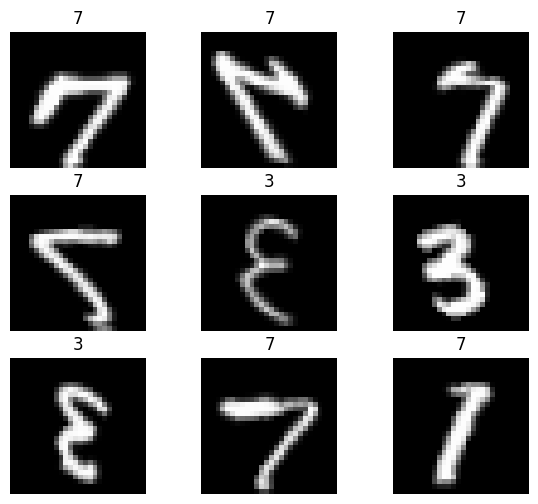

In [ ]:
from fastai.vision.all import *

# Download the MNIST sample dataset
path = untar_data(URLs.MNIST_SAMPLE)

# Create data loaders using a random split (20% validation)
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,       # Use 20% of the data for validation
    seed=42,             # Seed for reproducibility
    item_tfms=Resize(28),
    batch_tfms=aug_transforms()
)

# Display a batch of augmented images
dls.show_batch(max_n=9, figsize=(7,6))
